In [50]:
import dicom2nifti
import nibabel as nib
import nilearn as nil
from nilearn import plotting
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import os
from Data_import import load_image, visualise_image, plot_slice

# Settings

In [51]:
DATA_DIR = "C:\\awilde\\britta\\LTU\\DataMining\\Data\\Task02_Heart"
TRAIN_IMAGES = "imagesTr"
TRAIN_LABELS ="labelsTr"
TEST_IMAGES = "imagesTs"


In [52]:
train_images = sorted(os.listdir(os.path.join(DATA_DIR, TRAIN_IMAGES)))
train_labels = sorted(os.listdir(os.path.join(DATA_DIR, TRAIN_LABELS)))
data_dicts = [{"image": os.path.join(DATA_DIR, TRAIN_IMAGES ,image_name), "label": os.path.join(DATA_DIR, TRAIN_LABELS, label_name)} for image_name, label_name in zip(train_images, train_labels)]
train_files, val_files = data_dicts[:-4], data_dicts[-4:] # 16 train and 4 validation
train_files

[{'image': '/Users/emillundin/Desktop/D7043E/Project/Task02_Heart/imagesTr/la_003.nii.gz',
  'label': '/Users/emillundin/Desktop/D7043E/Project/Task02_Heart/labelsTr/la_003.nii.gz'},
 {'image': '/Users/emillundin/Desktop/D7043E/Project/Task02_Heart/imagesTr/la_004.nii.gz',
  'label': '/Users/emillundin/Desktop/D7043E/Project/Task02_Heart/labelsTr/la_004.nii.gz'},
 {'image': '/Users/emillundin/Desktop/D7043E/Project/Task02_Heart/imagesTr/la_005.nii.gz',
  'label': '/Users/emillundin/Desktop/D7043E/Project/Task02_Heart/labelsTr/la_005.nii.gz'},
 {'image': '/Users/emillundin/Desktop/D7043E/Project/Task02_Heart/imagesTr/la_007.nii.gz',
  'label': '/Users/emillundin/Desktop/D7043E/Project/Task02_Heart/labelsTr/la_007.nii.gz'},
 {'image': '/Users/emillundin/Desktop/D7043E/Project/Task02_Heart/imagesTr/la_009.nii.gz',
  'label': '/Users/emillundin/Desktop/D7043E/Project/Task02_Heart/labelsTr/la_009.nii.gz'},
 {'image': '/Users/emillundin/Desktop/D7043E/Project/Task02_Heart/imagesTr/la_010.nii

Image shape: (320, 320, 130)
Metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 0
dim             : [  3 320 320 130   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.   1.25 1.25 1.37 0.   0.   0.   0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'5.0.10')
aux_file        : np.bytes_(b'')
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qof

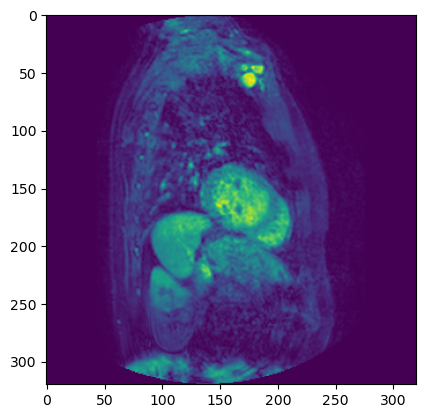

Image shape: (320, 320, 110)
Metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 0
dim             : [  3 320 320 110   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1.   1.25 1.25 1.37 0.   0.   0.   0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'5.0.10')
aux_file        : np.bytes_(b'')
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffse

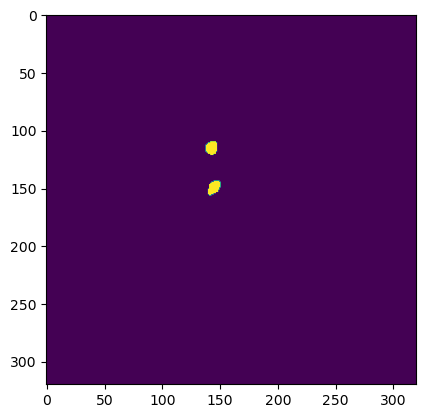

In [53]:
tr_img_001, tr_data_001 = load_image(data_dicts[0]["image"])
#visualise_image(tr_data_001)
plot_slice(tr_data_001, 30)

#Visualise one label image
label_img_001, label_data_001 = load_image(data_dicts[1]["label"])
#visualise_image(label_data_001)
plot_slice(label_data_001, 30)

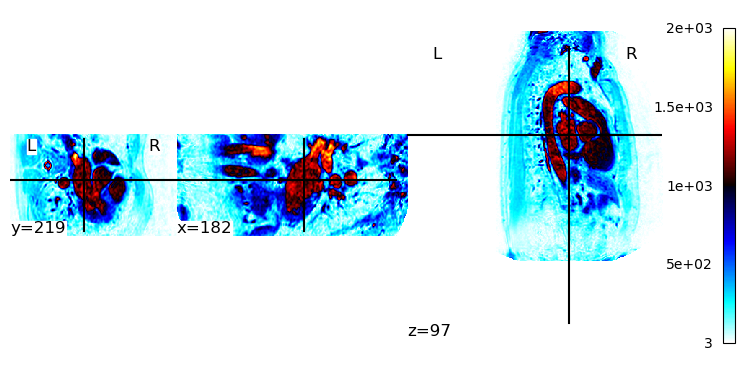

In [54]:
plotting.plot_stat_map(data_dicts[0]["image"], threshold=3)


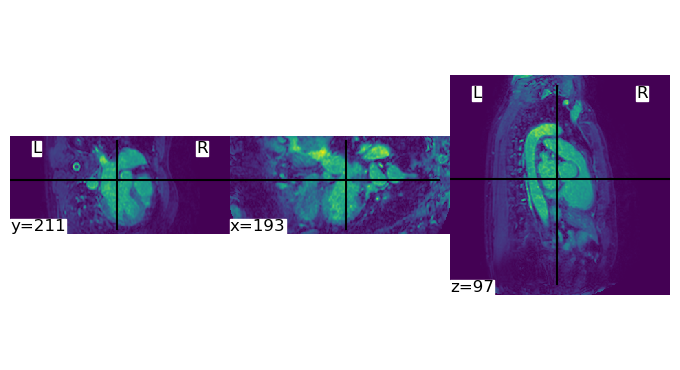

In [55]:
plotting.plot_img(data_dicts[0]["image"])

/Users/emillundin/anaconda3/envs/DataMiningProjectD7043E/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:870: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/emillundin/anaconda3/envs/DataMiningProjectD7043E/lib/python3.11/site-packages/nilearn/plotting/html_document.py:102: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn(



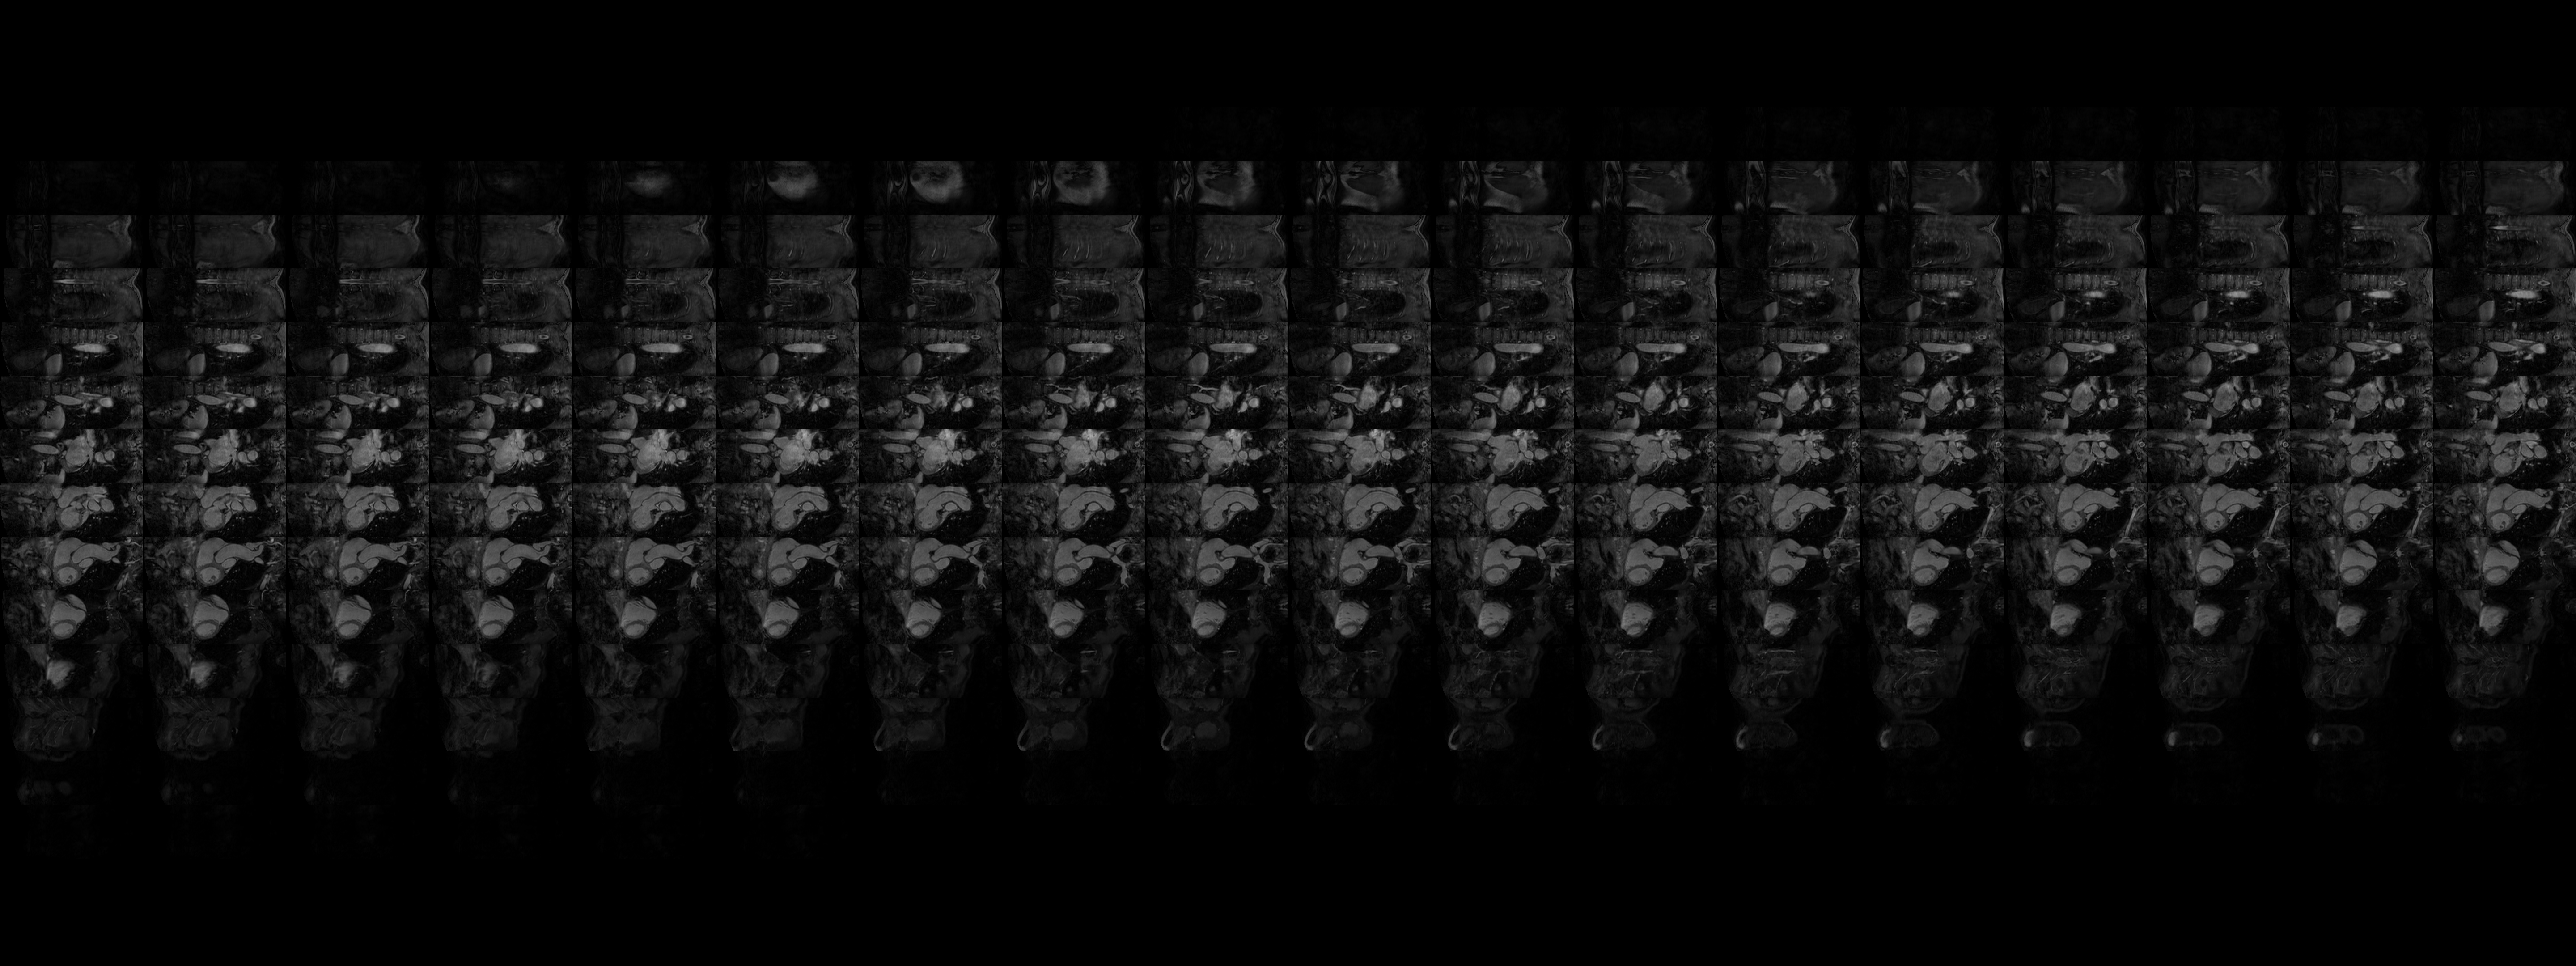
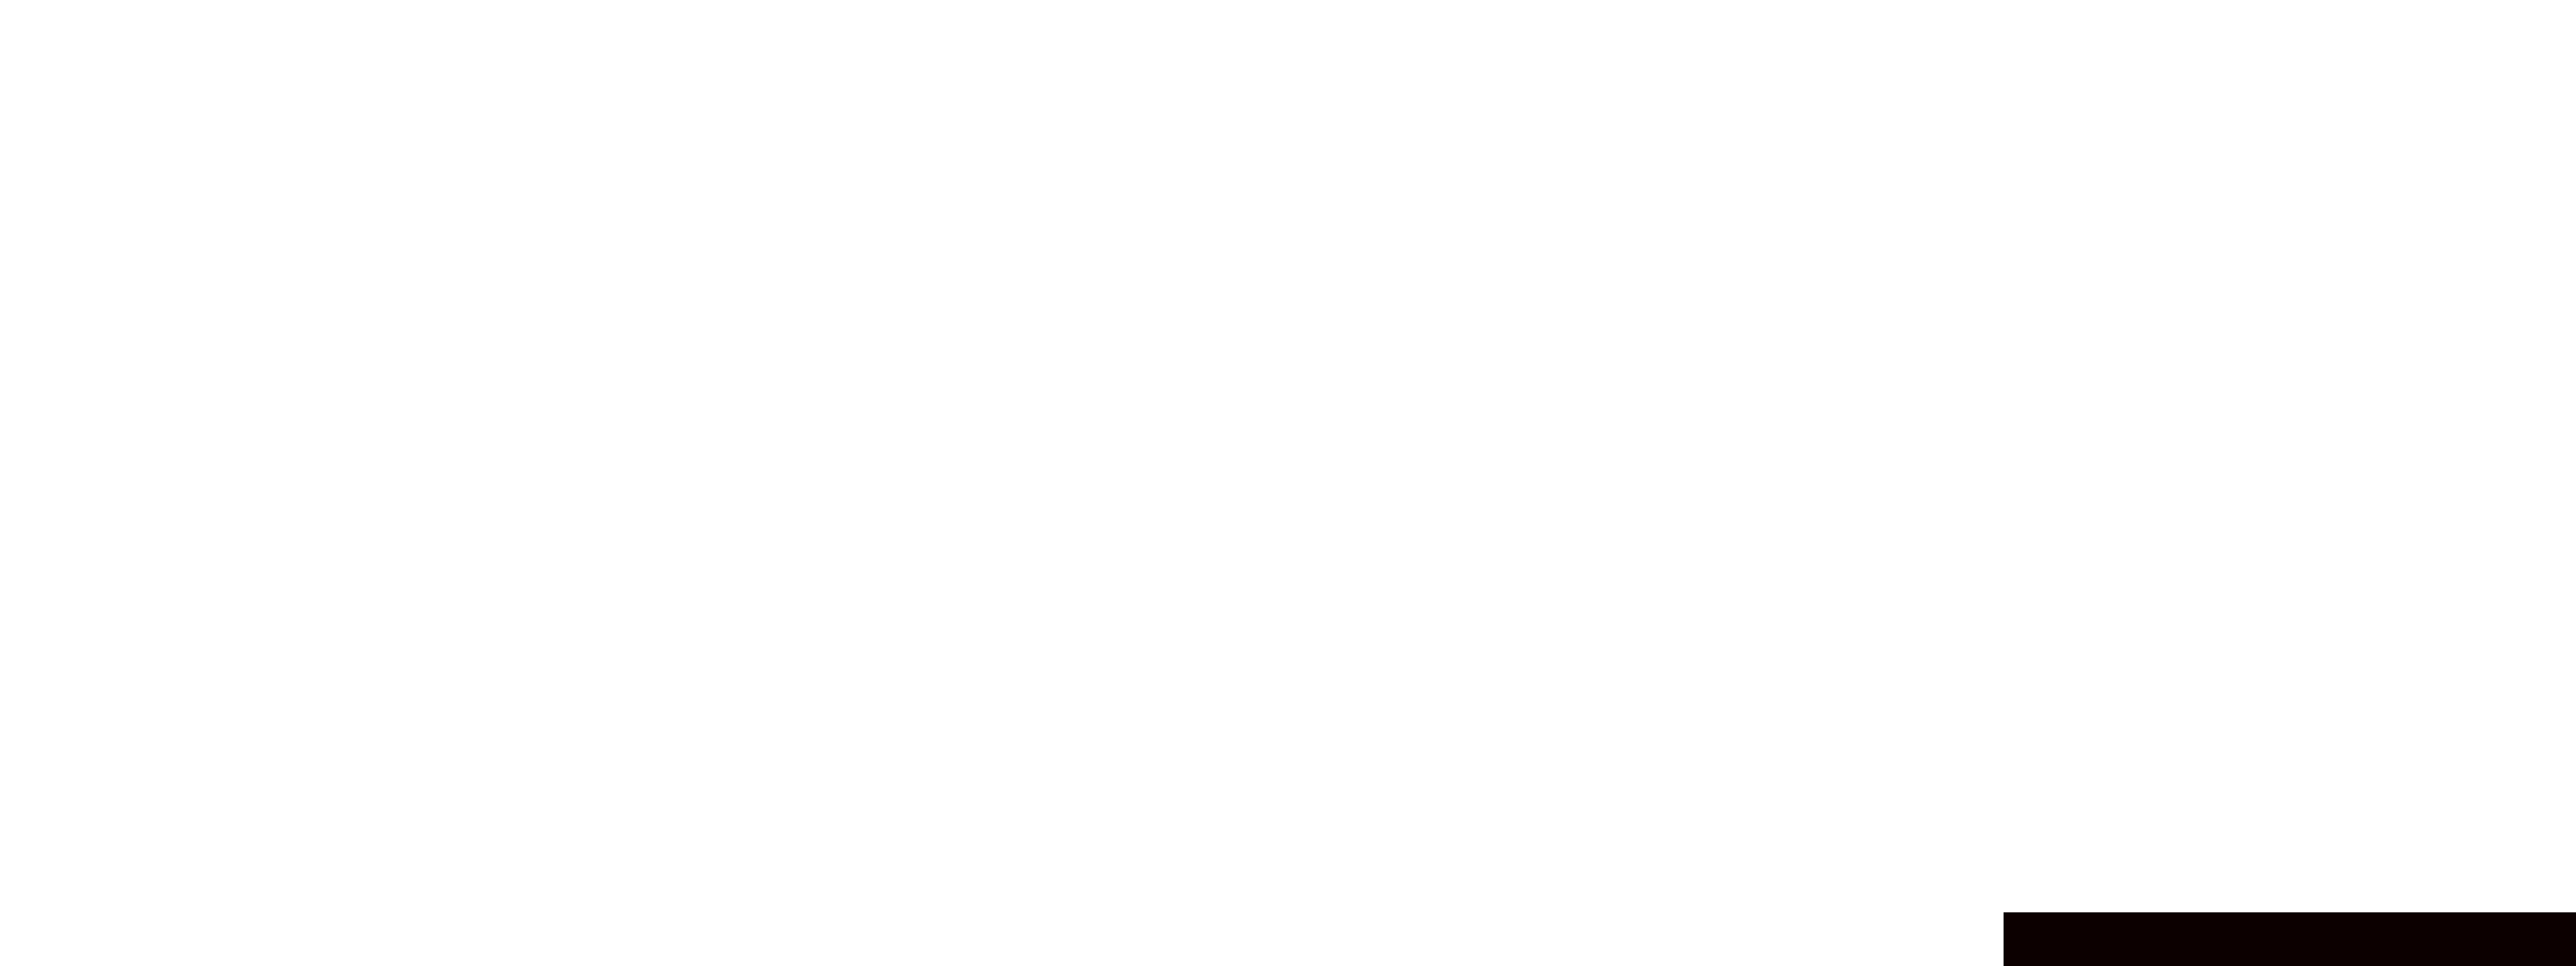

In [75]:
view = plotting.view_img(data_dicts[2]["label"], bg_img=data_dicts[2]["image"])
view

# Plot Image with label?!

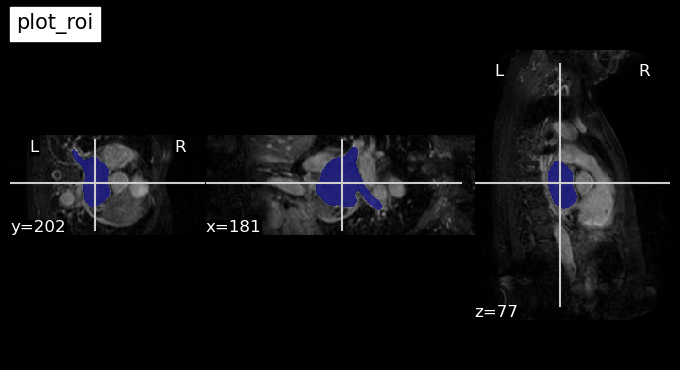

In [57]:
plotting.plot_roi(
    data_dicts[1]["label"], bg_img=data_dicts[1]["image"], title="plot_roi"
)

## Mosaic plot

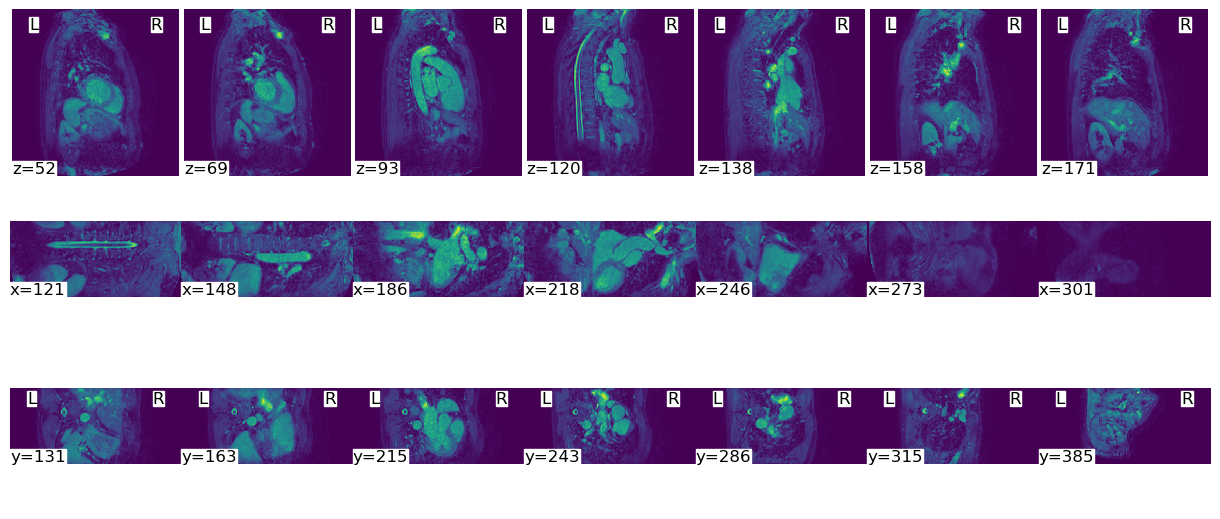

In [58]:
plotting.plot_img(data_dicts[0]["image"], display_mode="mosaic")
plt.show()

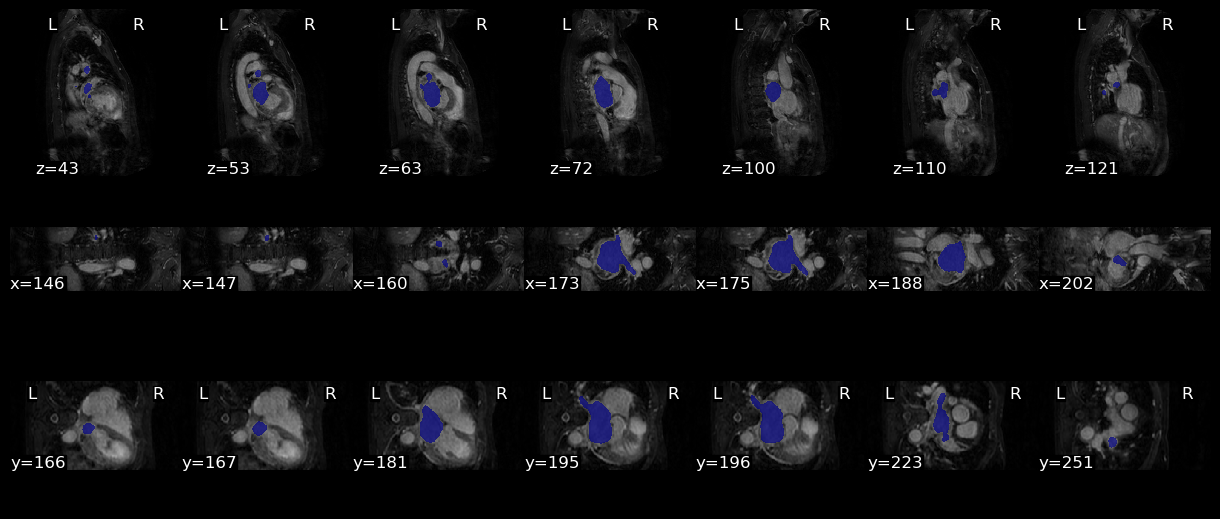

In [60]:
fig = plotting.plot_roi(
    data_dicts[1]["label"], bg_img=data_dicts[1]["image"], display_mode="mosaic"
)